In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import misc
import os,csv
from PIL import Image

um_per_pixel = 3.45

/var/folders/5m/g5fs7xk54kn3vvq43xy__w140000gp/T/ipykernel_69322/3573287198.py:4: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


## 780 HP

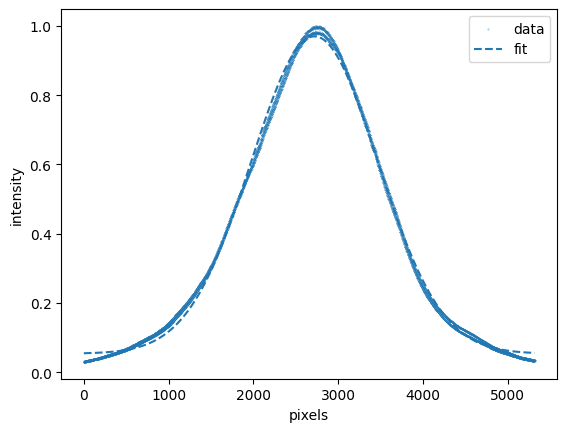

x waist = 4085.52 microns


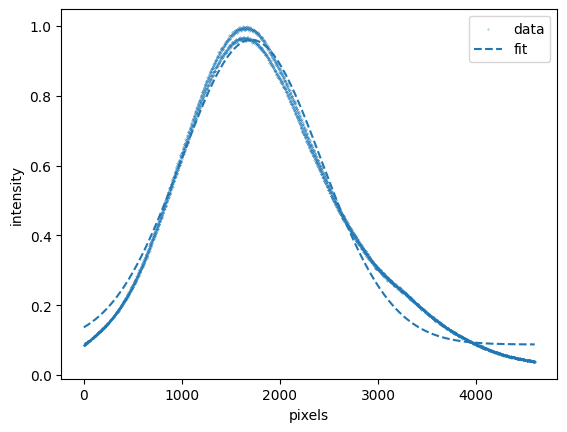

y waist = 3902.33 microns


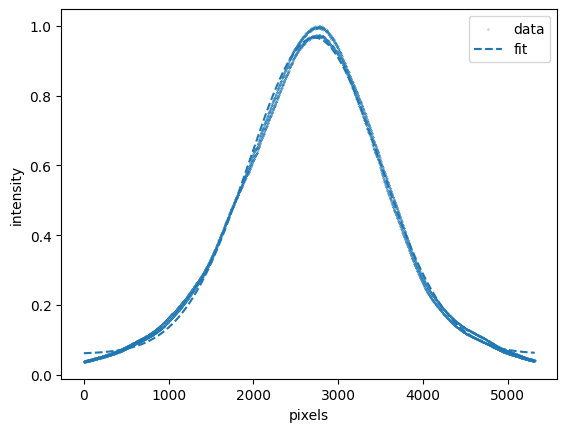

x waist = 4229.09 microns


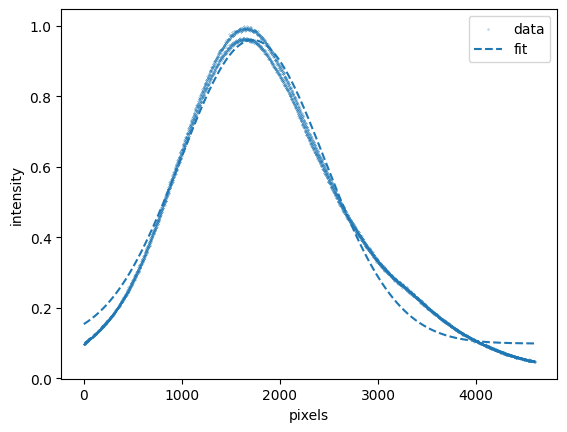

y waist = 4024.76 microns


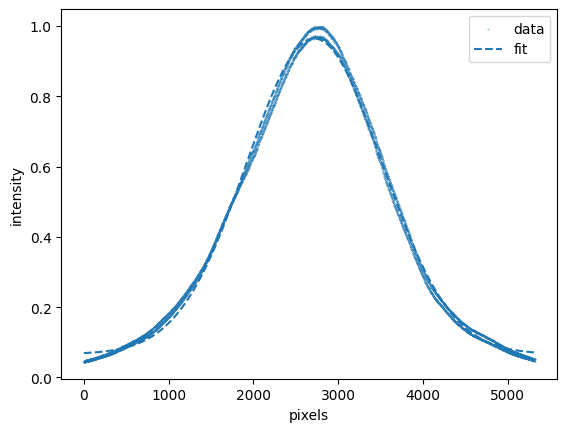

x waist = 4372.03 microns


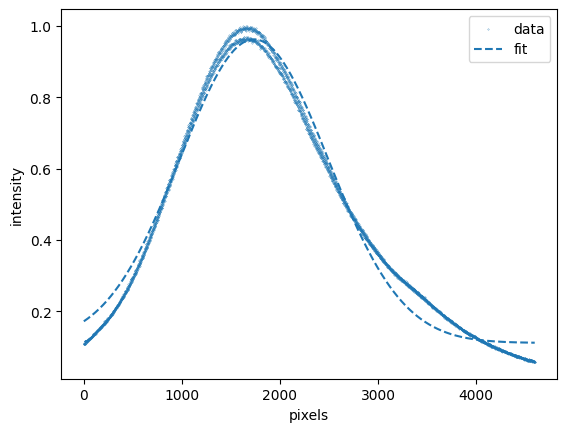

y waist = 4138.06 microns


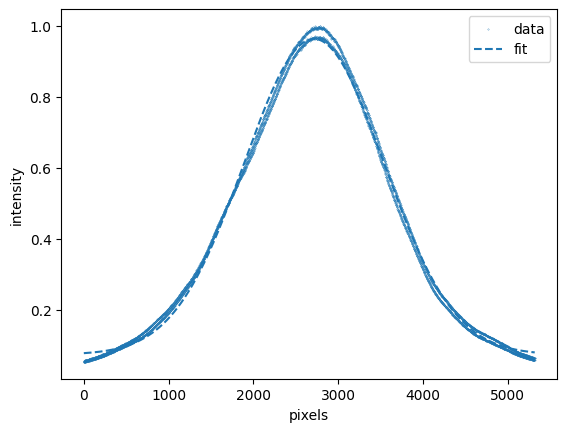

x waist = 4519.58 microns


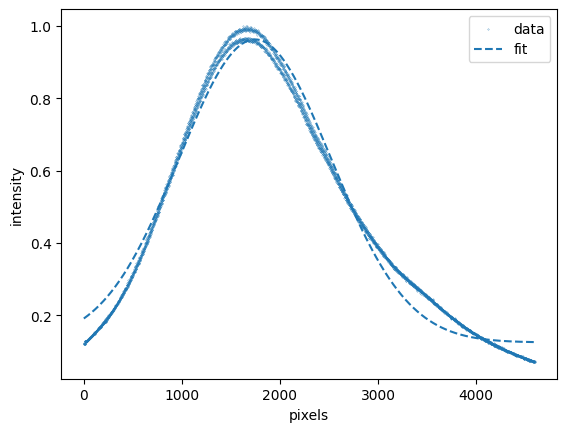

y waist = 4248.81 microns


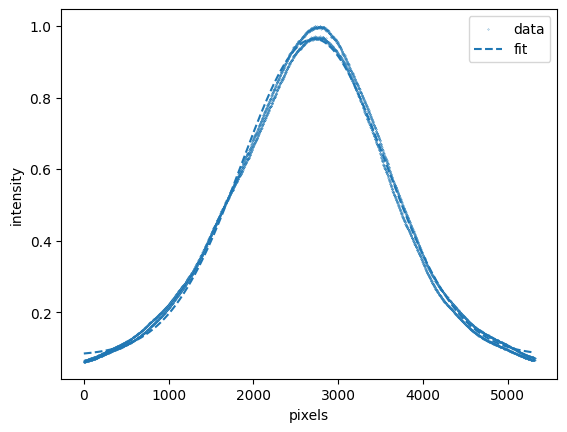

x waist = 4659.23 microns


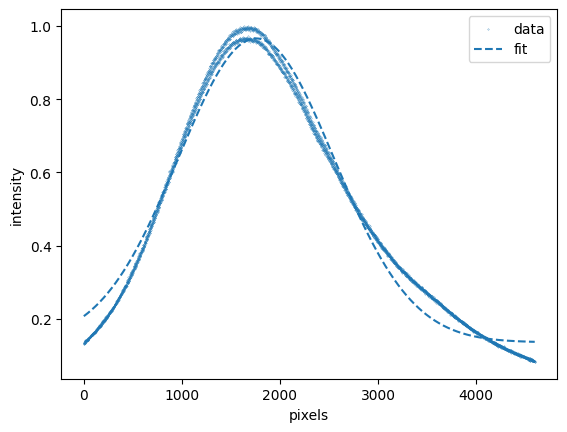

y waist = 4347.66 microns


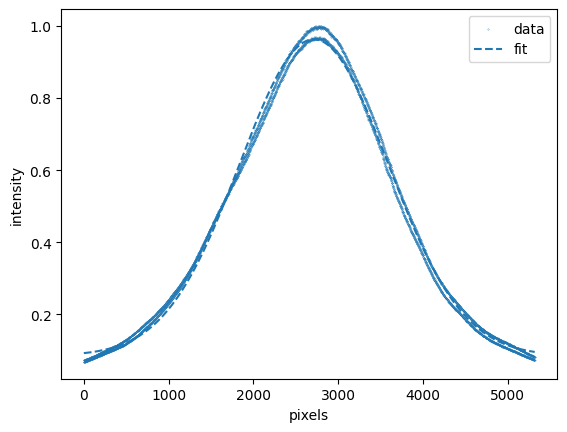

x waist = 4799.74 microns


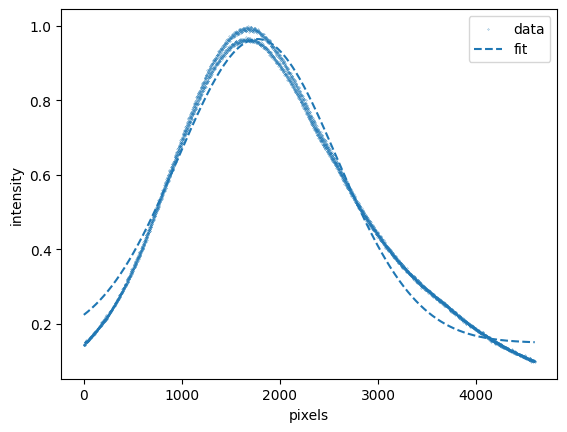

y waist = 4449.70 microns


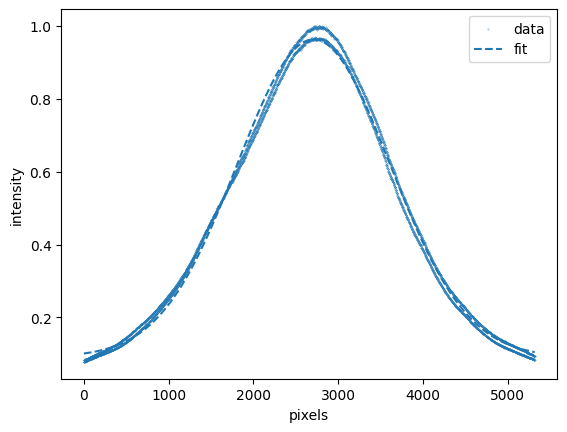

x waist = 4941.44 microns


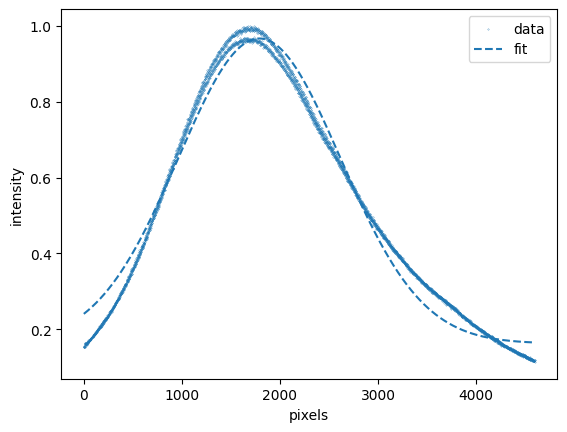

y waist = 4542.11 microns


In [8]:
um_per_pixel = 2.74 # for BFS-U3-244S8M-C

files = [f'{i}.bmp' for i in range(7)]

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','780PM-HP NA',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [9]:
[float(x) for x in xwaists]

[4085.524304597813,
 4229.091134790601,
 4372.026822482734,
 4519.578133569452,
 4659.232347998933,
 4799.738204621952,
 4941.43907973245]

In [10]:
[float(y) for y in xwaists]

[4085.524304597813,
 4229.091134790601,
 4372.026822482734,
 4519.578133569452,
 4659.232347998933,
 4799.738204621952,
 4941.43907973245]

In [11]:
xwaists[1] - xwaists[0]

np.float64(143.56683019278807)

In [12]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

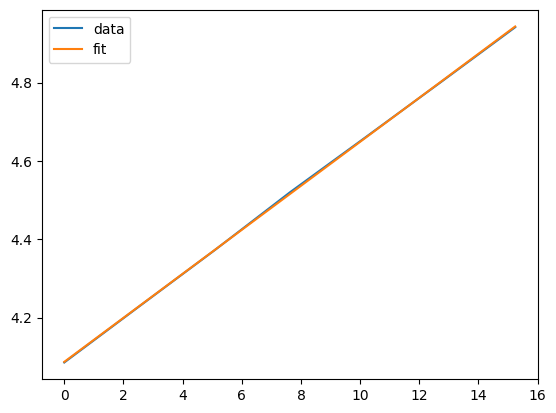

[0.05619016 4.08706386]


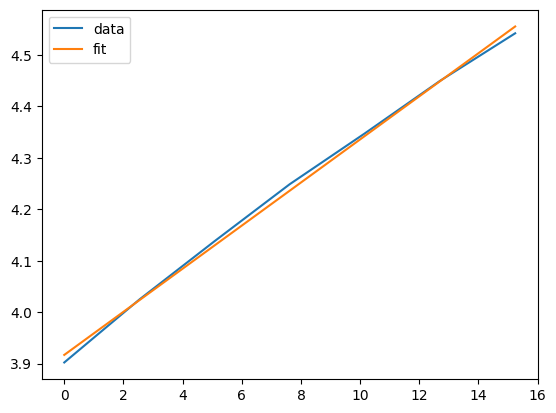

[0.04188441 3.91704614]


In [13]:
mm_pts = np.array(range(len(xwaists)))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [15]:
# MFD of fiber:
NA = 0.056
2*8.5e-7/(np.pi*NA)

9.662978687722218e-06

In [17]:
# MFD of fiber:
NA = 0.041
2*8.5e-7/(np.pi*NA)

1.3198214792986441e-05

## OZ optics fiber

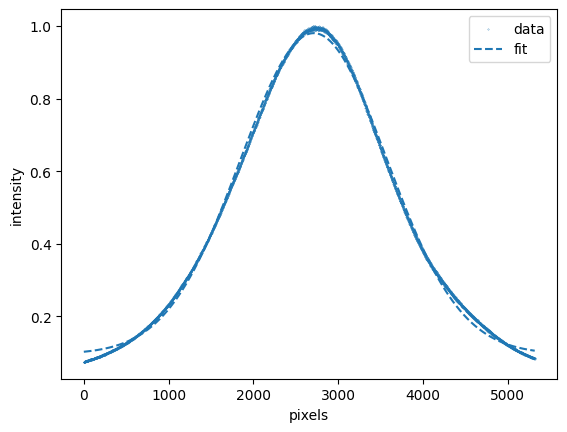

x waist = 4731.35 microns


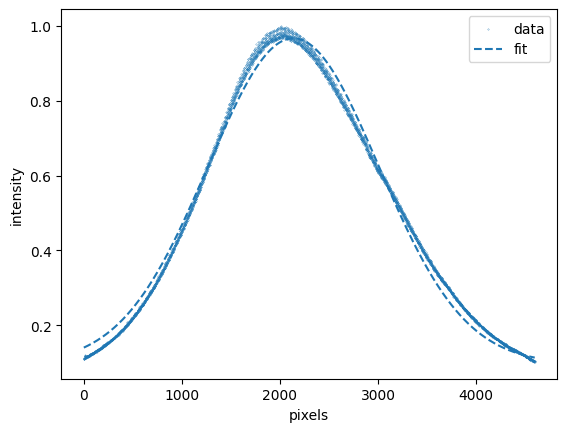

y waist = 4773.75 microns


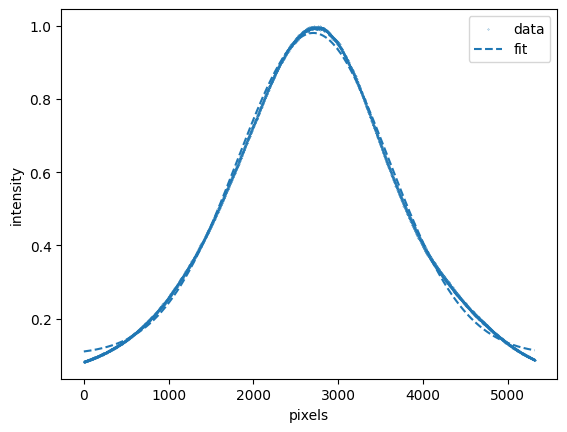

x waist = 4889.52 microns


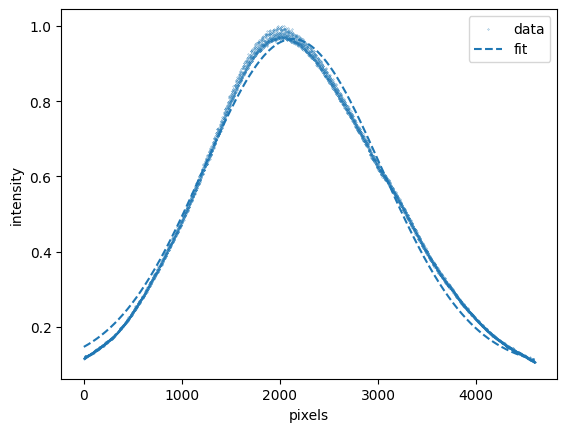

y waist = 4973.98 microns


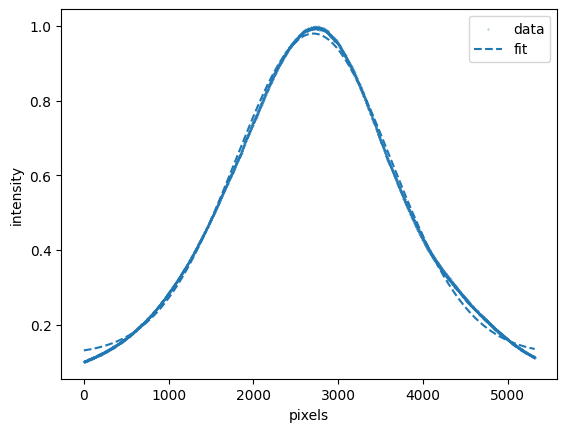

x waist = 5020.23 microns


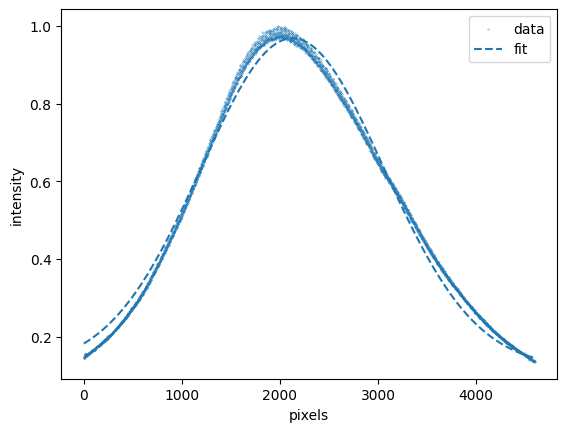

y waist = 5104.59 microns


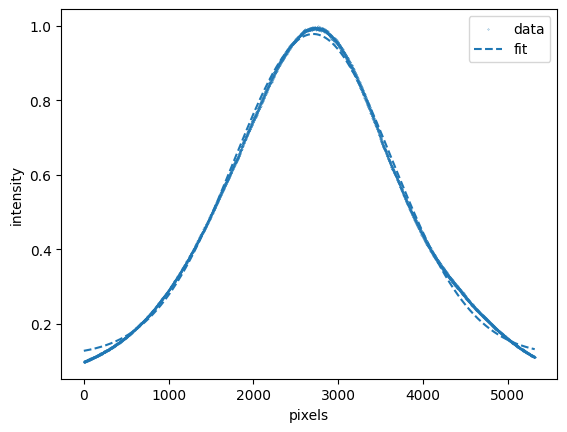

x waist = 5119.44 microns


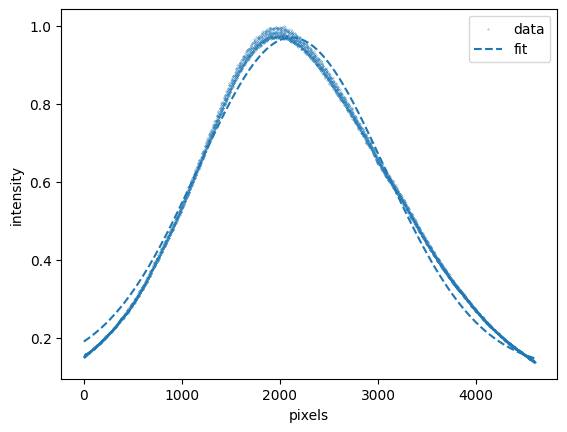

y waist = 5215.74 microns


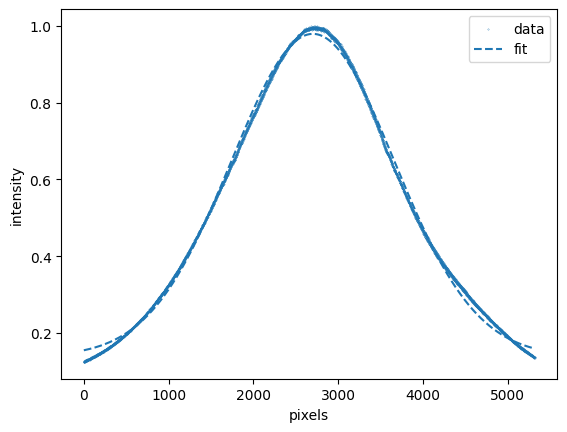

x waist = 5258.70 microns


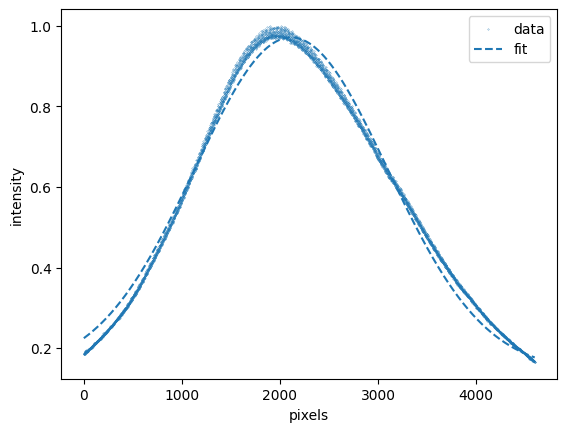

y waist = 5385.88 microns


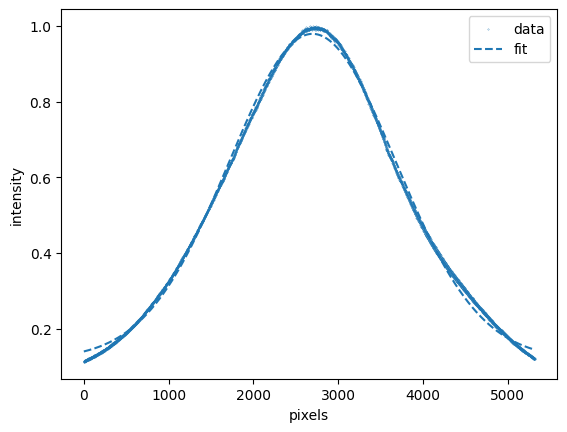

x waist = 5385.26 microns


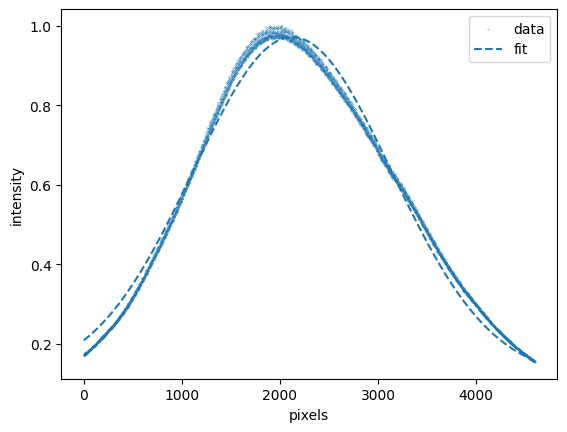

y waist = 5550.99 microns


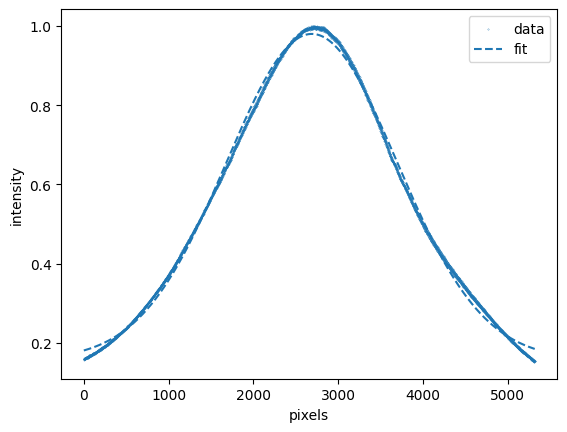

x waist = 5510.19 microns


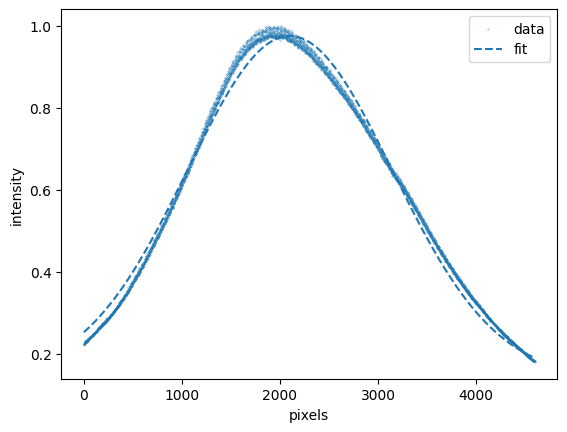

y waist = 5729.34 microns


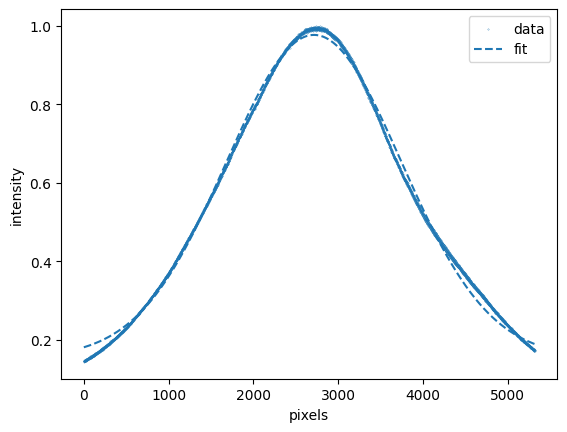

x waist = 5650.91 microns


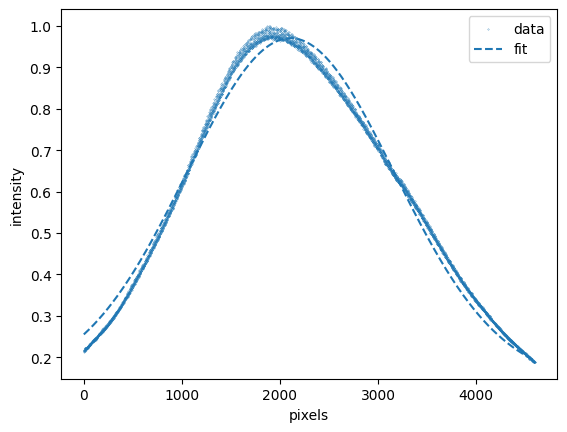

y waist = 5827.22 microns


In [18]:
um_per_pixel = 2.74 # for BFS-U3-244S8M-C

files = [f'{i}.bmp' for i in range(8)]

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','OZoptics-NA',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [19]:
[float(x) for x in xwaists]

[4731.34644981391,
 4889.5231178720405,
 5020.228768914133,
 5119.436007165452,
 5258.697557922909,
 5385.26291707128,
 5510.189428330376,
 5650.911617158938]

In [20]:
[float(y) for y in xwaists]

[4731.34644981391,
 4889.5231178720405,
 5020.228768914133,
 5119.436007165452,
 5258.697557922909,
 5385.26291707128,
 5510.189428330376,
 5650.911617158938]

In [21]:
xwaists[1] - xwaists[0]

np.float64(158.17666805813042)

In [22]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

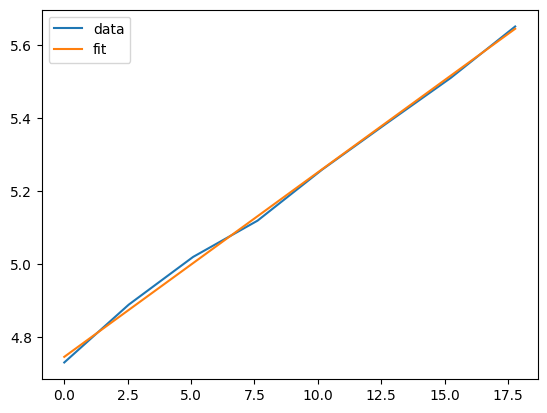

[0.05049987 4.74675566]


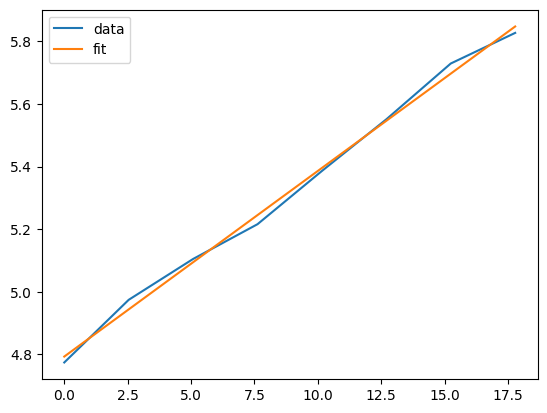

[0.05933838 4.79266678]


In [23]:
mm_pts = np.array(range(len(xwaists)))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [24]:
# MFD of fiber:
NA = 0.05
2*8.5e-7/(np.pi*NA)

1.0822536130248883e-05

In [25]:
# MFD of fiber:
NA = 0.059
2*8.5e-7/(np.pi*NA)

9.171640788346512e-06

## LMA fiber

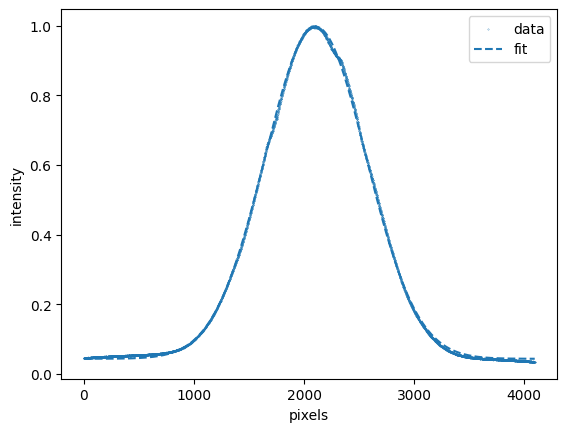

x waist = 3175.37 microns


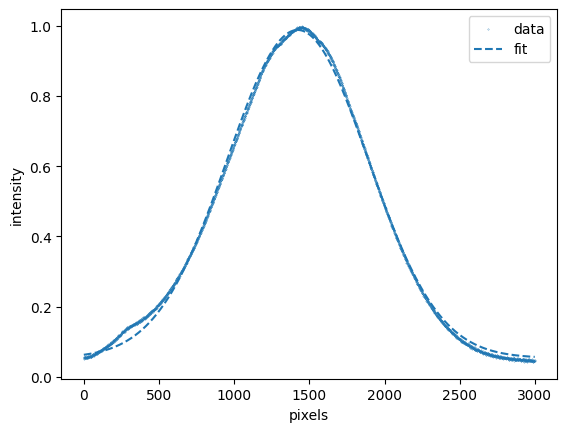

y waist = 3226.96 microns


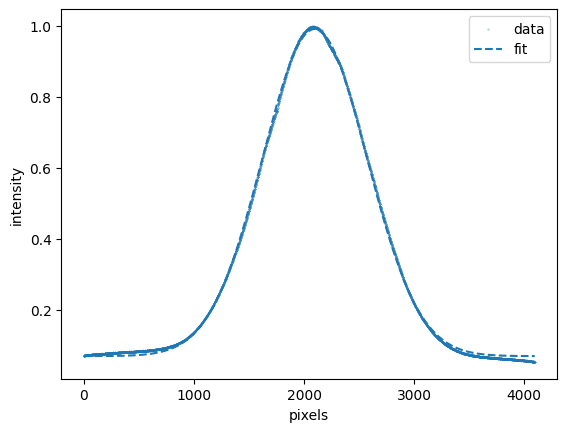

x waist = 3271.29 microns


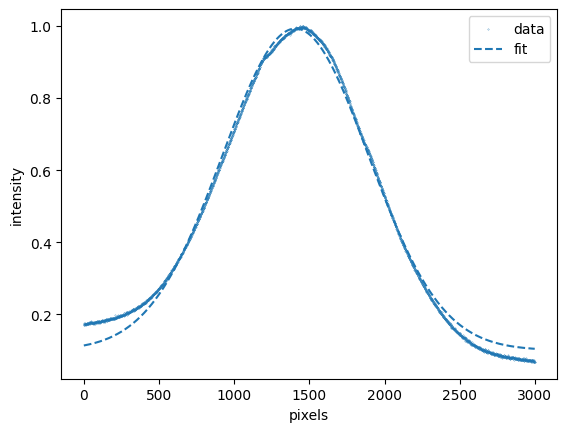

y waist = 3346.88 microns


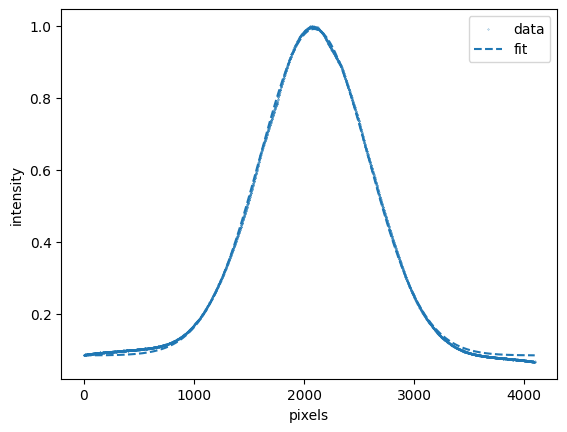

x waist = 3400.48 microns


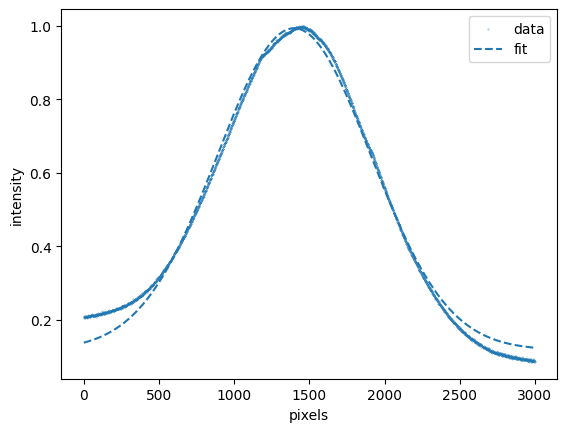

y waist = 3512.74 microns


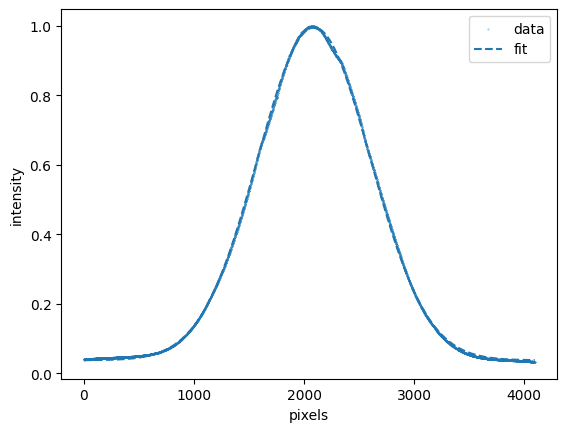

x waist = 3530.82 microns


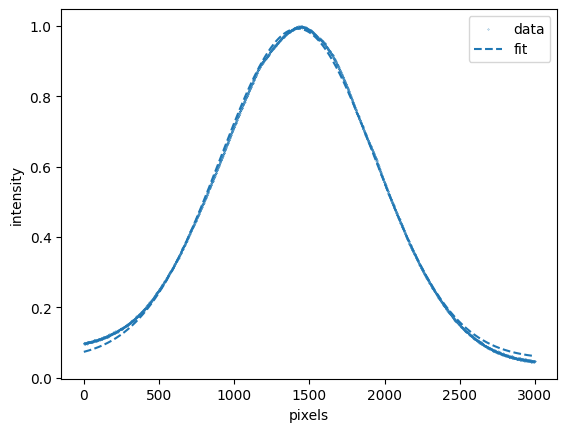

y waist = 3554.43 microns


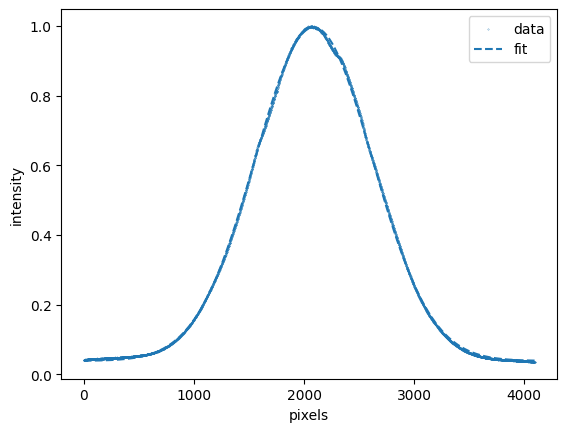

x waist = 3664.65 microns


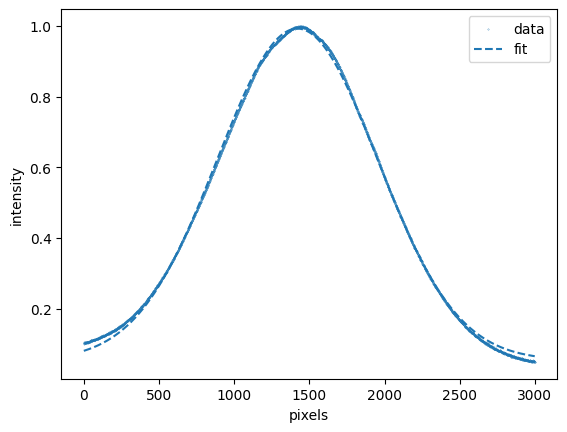

y waist = 3672.72 microns


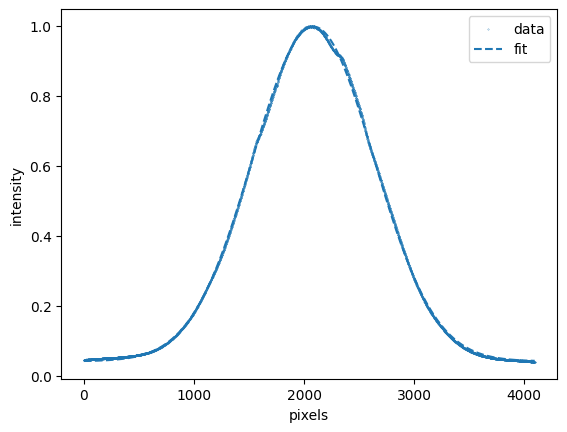

x waist = 3797.50 microns


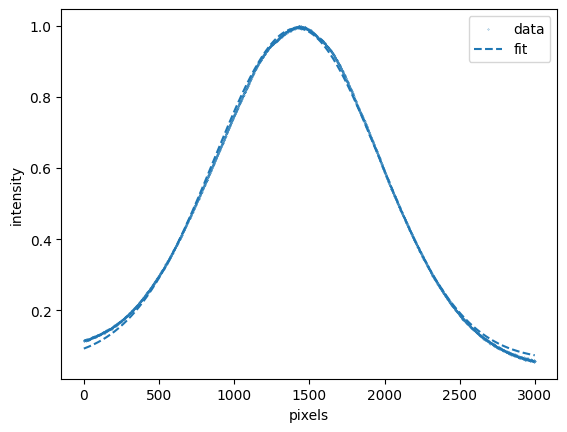

y waist = 3793.66 microns


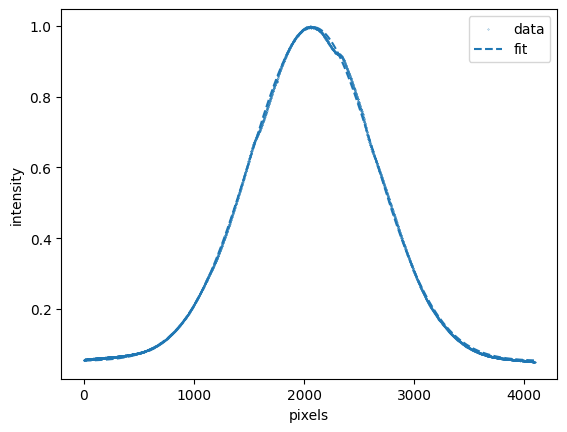

x waist = 3926.85 microns


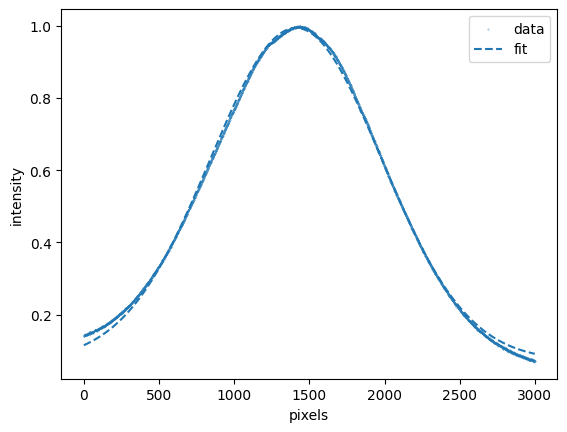

y waist = 3926.48 microns


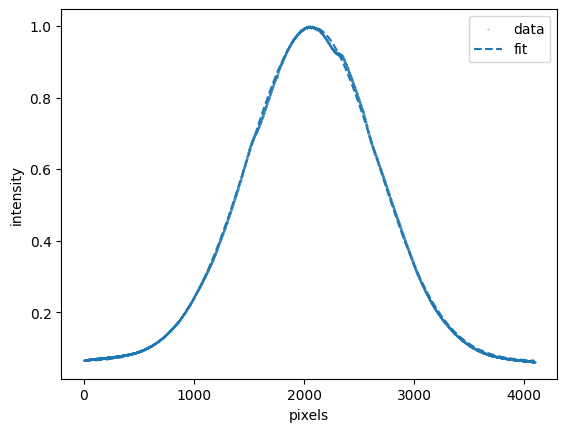

x waist = 4057.77 microns


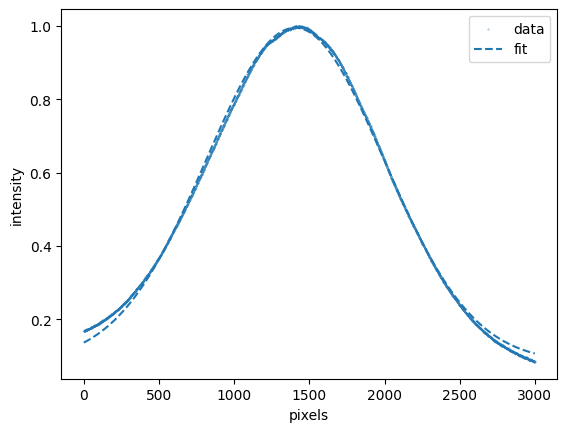

y waist = 4070.06 microns


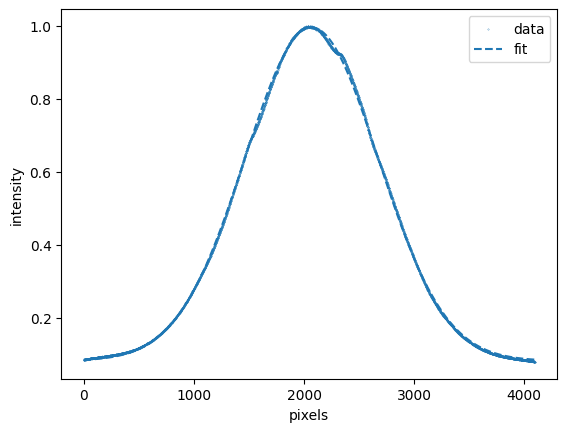

x waist = 4181.73 microns


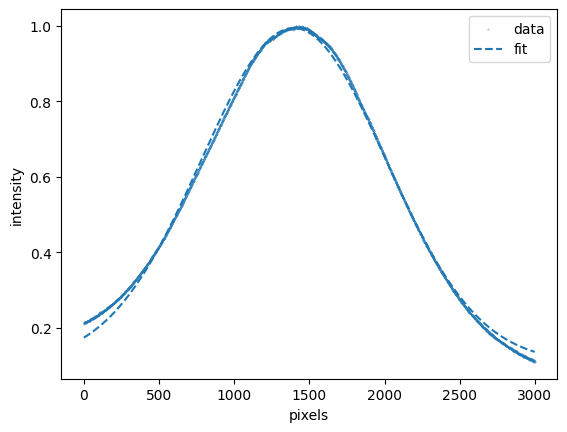

y waist = 4233.04 microns


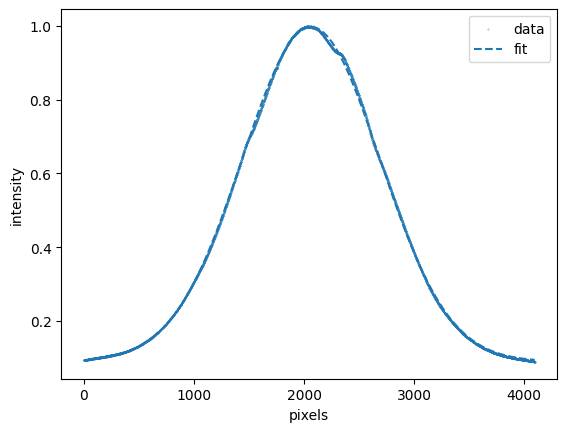

x waist = 4309.59 microns


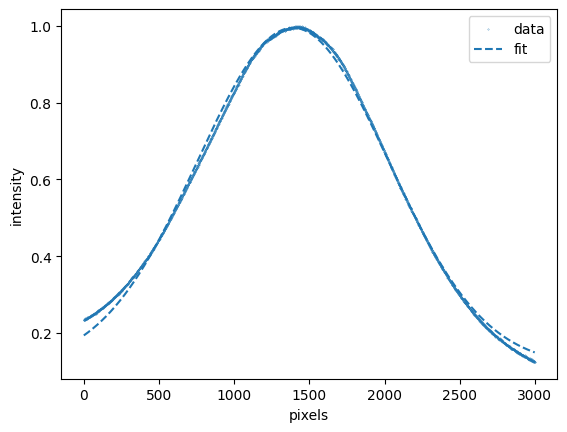

y waist = 4380.73 microns


In [56]:
um_per_pixel = 3.45 # for BFS-U3-122S6M-C

files = [f'{i}mm.bmp' for i in range(10)]

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','LMA-PM-15 NA measurements',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [57]:
[float(x) for x in xwaists]

[3175.3670455068936,
 3271.2917534466333,
 3400.47906158792,
 3530.8183284114007,
 3664.6530039758677,
 3797.5008616919285,
 3926.8538859059304,
 4057.7692141964867,
 4181.731770463938,
 4309.585323840279]

In [58]:
[float(y) for y in xwaists]

[3175.3670455068936,
 3271.2917534466333,
 3400.47906158792,
 3530.8183284114007,
 3664.6530039758677,
 3797.5008616919285,
 3926.8538859059304,
 4057.7692141964867,
 4181.731770463938,
 4309.585323840279]

In [59]:
xwaists[1] - xwaists[0]

np.float64(95.92470793973962)

In [72]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

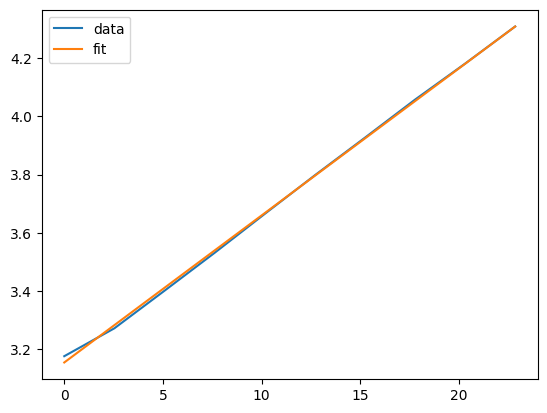

[0.05055703 3.15373821]


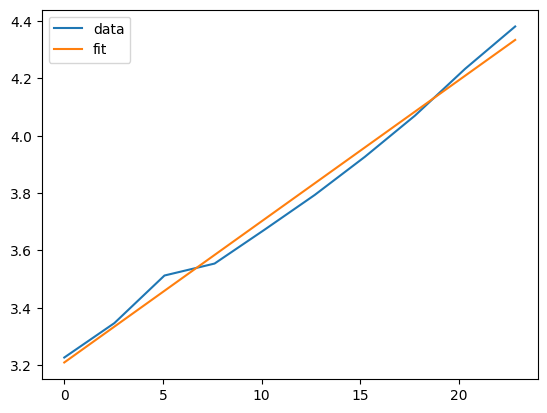

[0.0491786  3.20965783]


In [78]:
mm_pts = np.array(range(10))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [79]:
# MFD of fiber:
NA = 0.05
2*8.5e-7/(np.pi*NA)

1.0822536130248883e-05